In [2]:
import pandas as pd
import re


df_analysis = pd.read_csv(f"/content/diabetes_train_analysis.csv")
df_info = pd.read_csv(f"/content/diabetes_train_info.csv")

df = pd.merge(df_info, df_analysis, on='id')


In [3]:
df.head()

,id,age,height,weight,gender,cholesterol,gluc,smoke,alco,active,pressure,diabetes,ket
0,0,50,168,62.0,f,low,low,0,0,1,110/80,0,5.05
1,1,55,156,85.0,m,high,low,0,0,1,140/90,0,3.68
2,2,18857,165,64.0,male,high,low,0,0,0,130/70,0,6.00
3,3,17623,169,82.0,f,low,low,0,0,1,150/100,0,5.59
4,4,47,156,56.0,m,low,low,0,0,0,100/60,0,5.39


In [4]:
delimeter = re.compile('(\\\\|/)')
df[['pressure_1', 'pressure_2']] = df['pressure'].str.split('[\\/\\\\]', expand=True)
df['pressure_1'] = df['pressure_1'].astype(int)
df['pressure_2'] = df['pressure_2'].astype(int)
df.drop('pressure', axis=1, inplace=True)

df['gender'] = df['gender'].str[0]

In [5]:
for name in df.columns:
    if (name != "id"):
        print(f"Column {name}:")
        print(df[name].value_counts())
        print("\n")


Column age:
53       995
55       993
57       967
56       913
59       913
        ... 
17717      1
16921      1
15484      1
14867      1
22364      1
Name: age, Length: 7667, dtype: int64


Column height:
165    5058
160    4294
170    3991
168    3719
164    2913
       ... 
112       1
98        1
74        1
76        1
96        1
Name: height, Length: 104, dtype: int64


Column weight:
65.0     3315
70.0     3266
68.0     2441
60.0     2316
80.0     2250
         ... 
121.3       1
163.0       1
59.5        1
106.5       1
57.8        1
Name: weight, Length: 269, dtype: int64


Column gender:
m    39125
f    20875
Name: gender, dtype: int64


Column cholesterol:
low       44914
medium     8218
high       6868
Name: cholesterol, dtype: int64


Column gluc:
low       50968
high       4582
medium     4450
Name: gluc, dtype: int64


Column smoke:
0    54736
1     5264
Name: smoke, dtype: int64


Column alco:
0    56810
1     3190
Name: alco, dtype: int64


Column active:
1    482

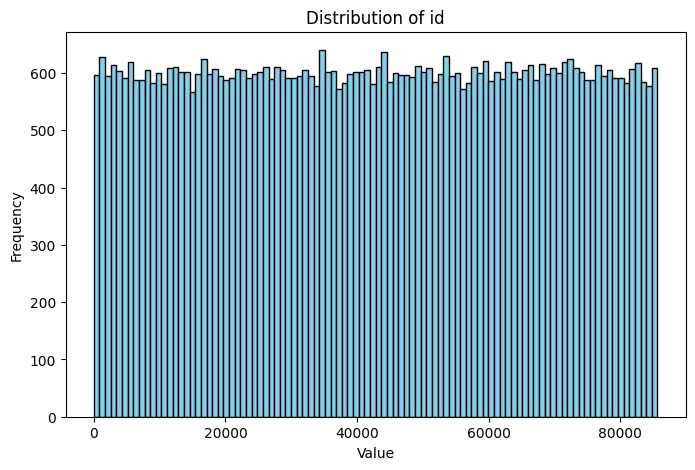

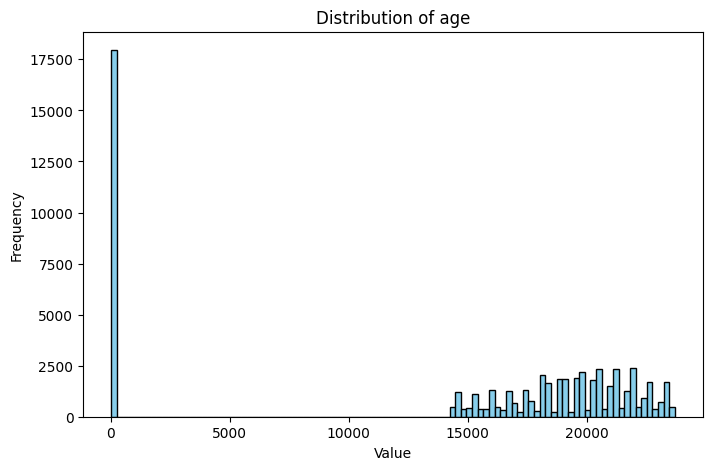

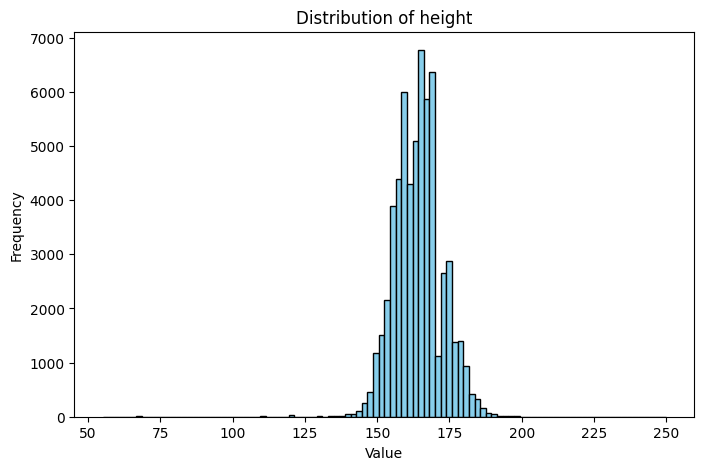

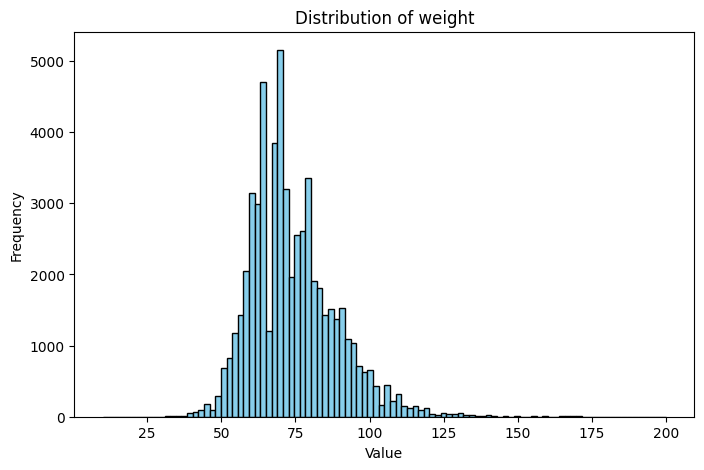

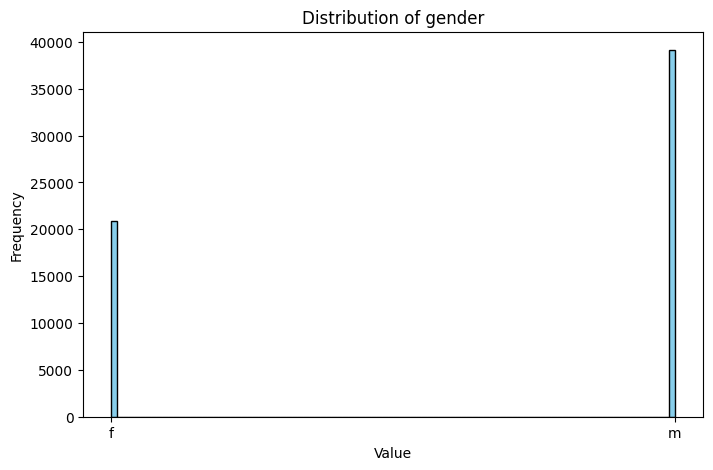

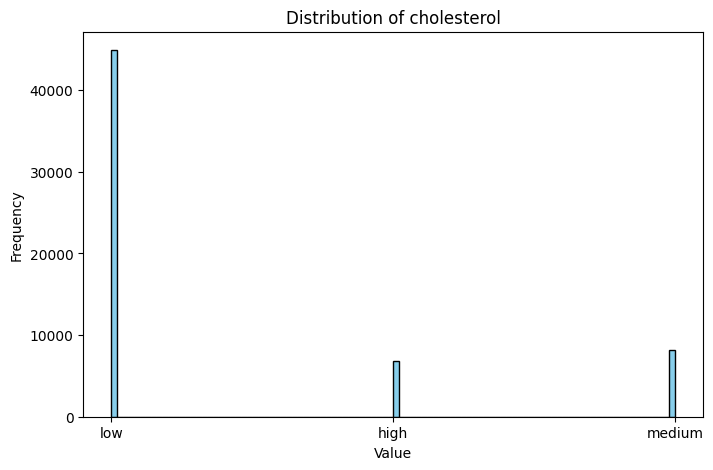

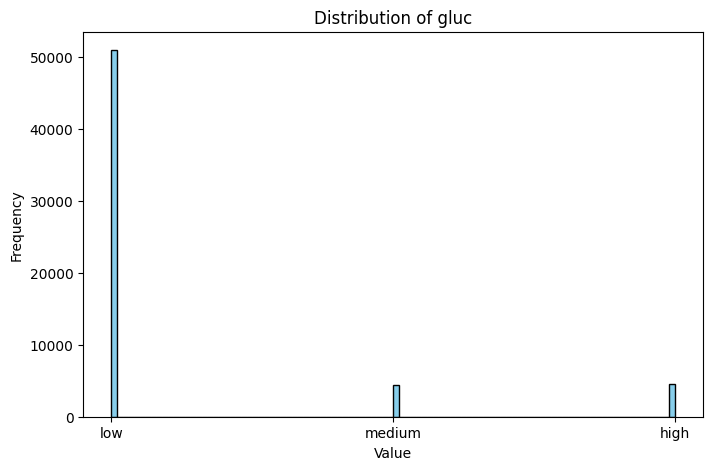

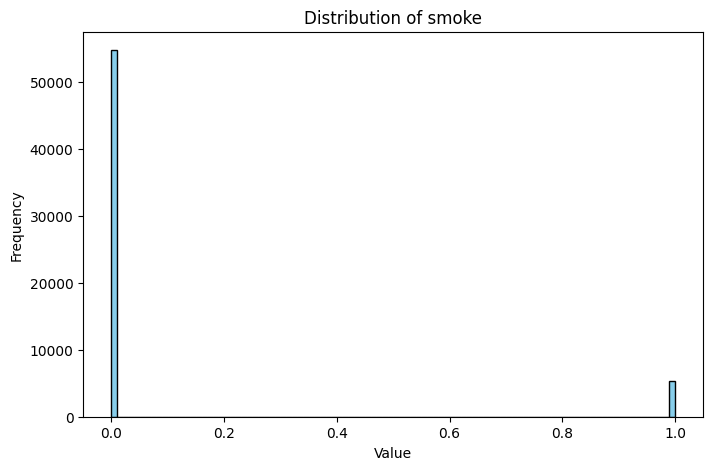

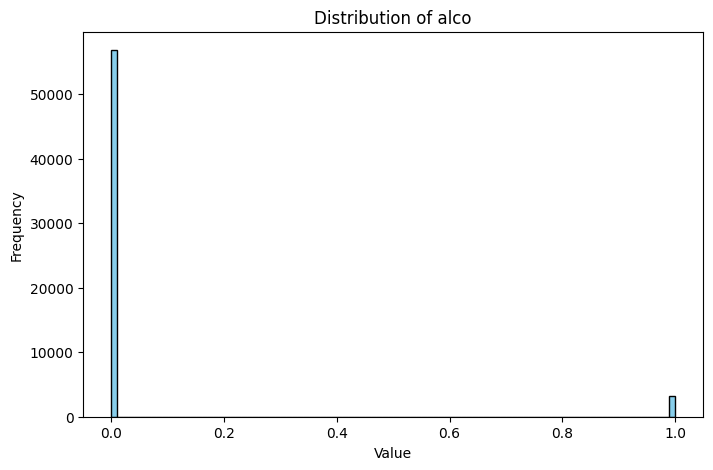

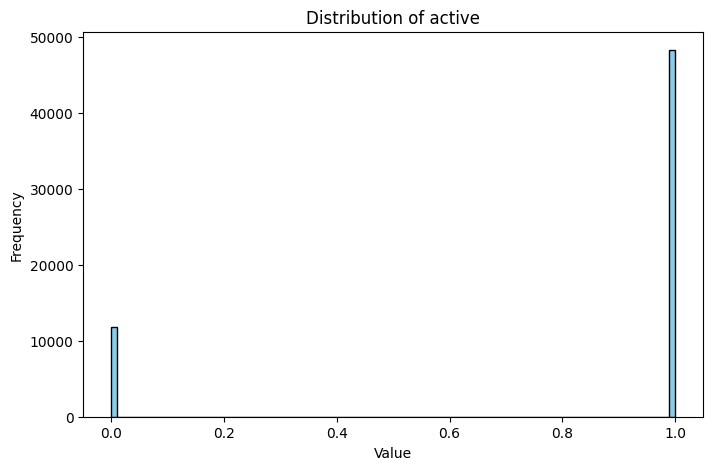

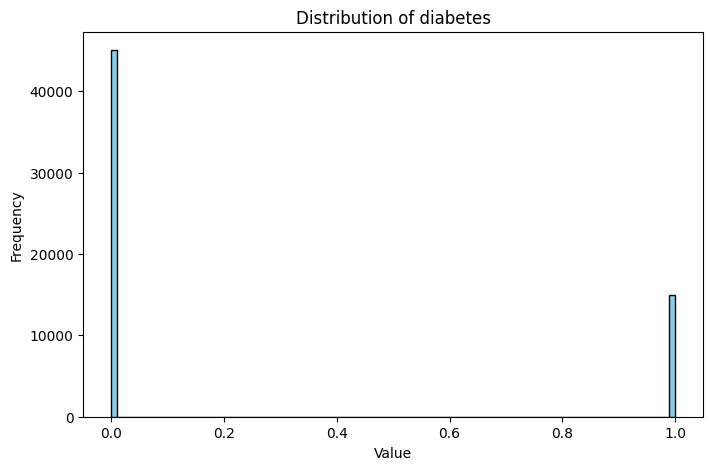

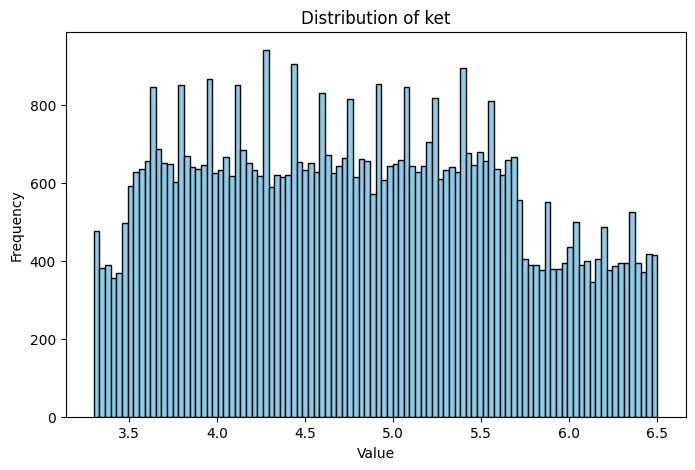

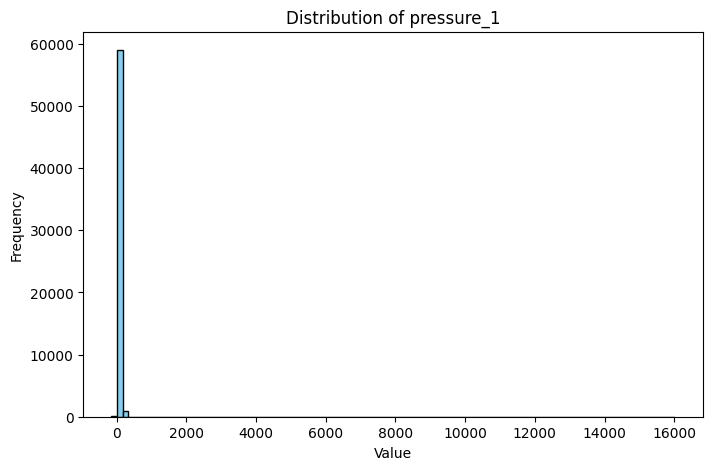

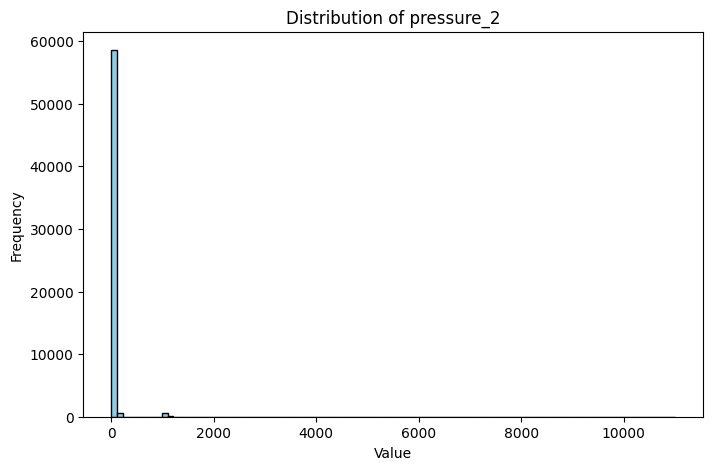

In [9]:
import matplotlib.pyplot as plt

def print_distributions(df):
    for column in df.columns:
        plt.figure(figsize=(8, 5))
        plt.hist(df[column], bins=100, color='skyblue', edgecolor='black')
        plt.title(f'Distribution of {column}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.show()

print_distributions(df)

In [10]:
df.describe()

,id,age,height,weight,smoke,alco,active,diabetes,ket,pressure_1,pressure_2
count,60000.000000,60000.000000,60000.000000,58002.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,42833.062250,13662.133367,164.348450,74.186134,0.087733,0.053167,0.804200,0.249300,4.807951,129.081183,96.523683
std,24728.232536,9130.429102,8.198147,14.609311,0.282909,0.224368,0.396819,0.432611,0.855948,165.893251,190.032434
min,0.000000,30.000000,55.000000,10.000000,0.000000,0.000000,0.000000,0.000000,3.300000,-150.000000,0.000000
25%,21443.250000,60.000000,159.000000,65.000000,0.000000,0.000000,1.000000,0.000000,4.080000,120.000000,80.000000
50%,42897.500000,18174.000000,165.000000,71.000000,0.000000,0.000000,1.000000,0.000000,4.780000,120.000000,80.000000
75%,64271.750000,20579.000000,170.000000,82.000000,0.000000,0.000000,1.000000,0.000000,5.480000,140.000000,90.000000
max,85655.000000,23713.000000,250.000000,200.000000,1.000000,1.000000,1.000000,1.000000,6.500000,16020.000000,11000.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           60000 non-null  int64  
 1   age          60000 non-null  int64  
 2   height       60000 non-null  int64  
 3   weight       58002 non-null  float64
 4   gender       60000 non-null  object 
 5   cholesterol  60000 non-null  object 
 6   gluc         60000 non-null  object 
 7   smoke        60000 non-null  int64  
 8   alco         60000 non-null  int64  
 9   active       60000 non-null  int64  
 10  diabetes     60000 non-null  int64  
 11  ket          60000 non-null  float64
 12  pressure_1   60000 non-null  int64  
 13  pressure_2   60000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 6.9+ MB


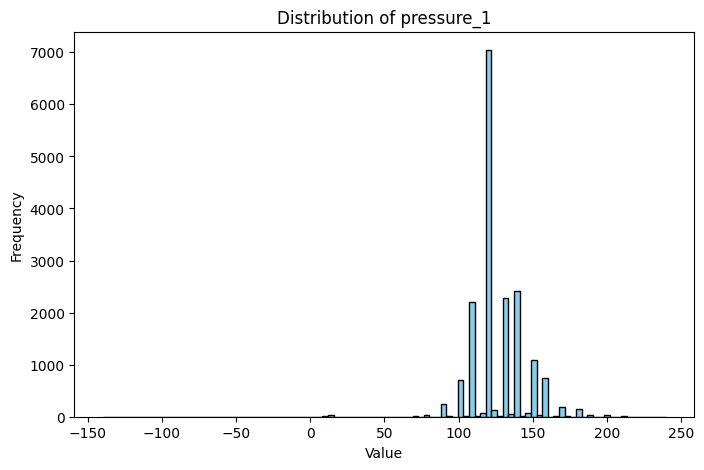

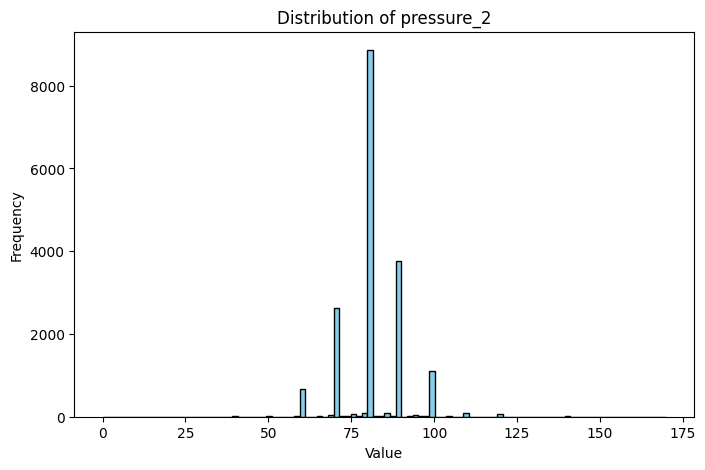

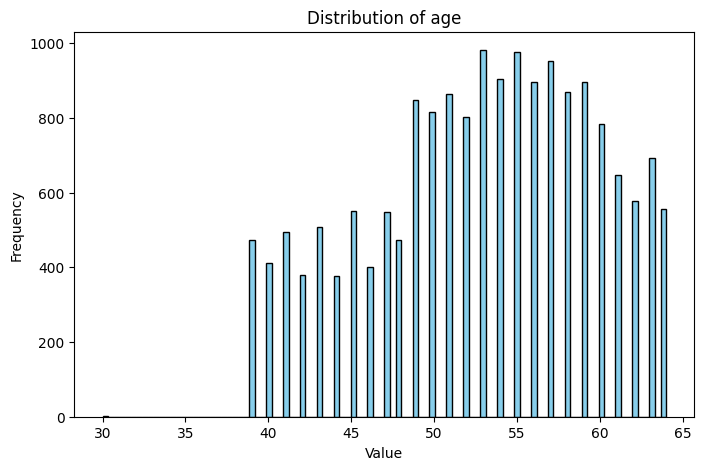

In [12]:
df_edited = df[(df['pressure_1'] <= 350) &  (df['pressure_2'] <= 300) & (df['age'] <= 140)]
print_distributions(df_edited[['pressure_1', 'pressure_2', 'age']])

In [15]:
def preprocess(df):

    #представим давление в виде двух значений
    delimeter = re.compile('(\\\\|/)')
    df[['pressure_1', 'pressure_2']] = df['pressure'].str.split('[\\/\\\\]', expand=True)
    df[['pressure_1', 'pressure_2']] = df[['pressure_1', 'pressure_2']].astype(int)
    df.drop(['id','pressure'], axis=1, inplace=True)

    #удалим невозможные данные
    cond_1 = (df['pressure_1'] > 350) & (df['pressure_1'] < 1)
    cond_2 = (df['pressure_2'] > 300) & (df['pressure_2'] < 1)
    cond_3 = (df['age'] > 140)

    df.loc[cond_1, 'pressure_1'] = np.nan
    df.loc[cond_2, 'pressure_2'] = np.nan
    df.loc[cond_3, 'age'] = np.nan

    #заменим пустые значения давления на моду
    df['pressure_1'] = df['pressure_1'].fillna(df['pressure_1'].mode())
    df['pressure_2'] = df['pressure_2'].fillna(df['pressure_2'].mode())

    #заменим пустые значения возраста на среднее
    df['age'] = df['age'].fillna(df['age'].mean())
    df['age'] = df['age'].astype(int)

    #заменим пустые значения веса на медиану
    df['weight'] = df['weight'].fillna(df['weight'].median())

    #преобразуем пол в однобуквенный вид
    df['gender'] = df['gender'].str[0].replace({'m': 1, 'f': 0})

    return df

In [14]:
!pip install Boruta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.6 MB/s eta 0:00:00


Посмотрим, есть ли незначимые числовые признаки

In [ ]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
import numpy as np

df = preprocess(pd.merge(df_info, df_analysis, on='id'))
df.drop(['id', 'cholesterol', 'gluc'], axis=1, inplace=True)

X = df.drop('diabetes', axis=1).values
y = df['diabetes'].values.ravel()

rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)
feat_selector.fit(X, y)
feat_selector.support_


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	10
Tentative: 	0
Rejected: 	0


BorutaPy finished running.

Iteration: 	13 / 100
Confirmed: 	10
Tentative: 	0
Rejected: 	0


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])